# Full Data Analysis Notebook
This notebook visualizes the synthetic time-series data, anomalies, and feature behaviors.

## Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/synthetic_timeseries.csv', parse_dates=['timestamp'])
df.head()

,timestamp,voltage,current,power,pf,freq,harmonics,anomaly,power_ma_5,power_std_5,current_diff_1,power_pct_change_1
0,2025-06-01 00:00:00,229.931,0.3688,84.795,0.980,49.995,0.00234,0,84.79500,0.000000,0.0000,0.000000
1,2025-06-01 00:01:00,230.505,0.3421,78.860,0.939,49.989,0.00924,0,81.82750,4.196679,-0.0267,-0.069992
2,2025-06-01 00:02:00,229.719,0.3179,73.033,0.956,49.982,0.01412,0,78.89600,5.881083,-0.0242,-0.073890
3,2025-06-01 00:03:00,230.299,0.3987,91.823,0.958,50.002,0.00515,0,82.12775,8.052013,0.0808,0.257281
4,2025-06-01 00:04:00,229.854,0.3371,77.484,0.987,50.000,0.01058,0,81.19900,7.275924,-0.0616,-0.156159


## Plot Power Time-Series

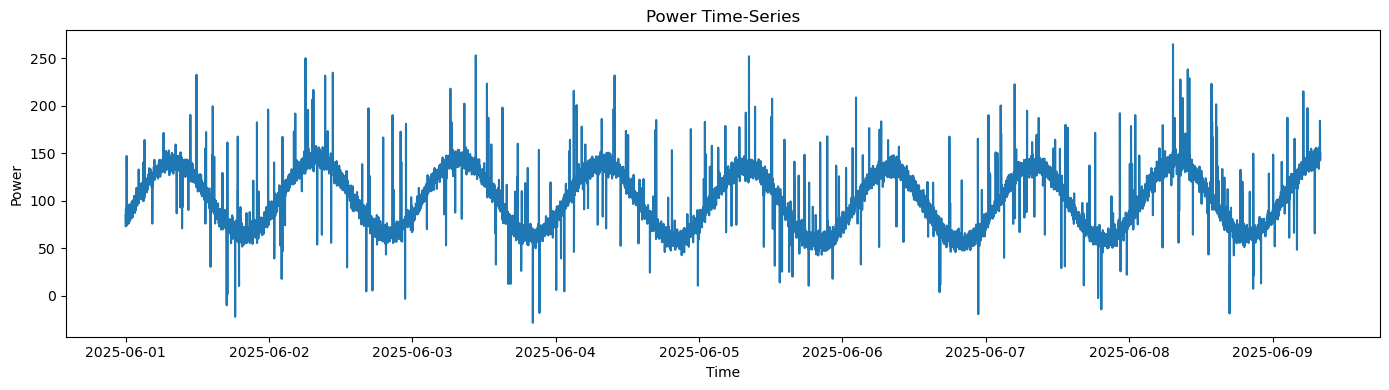

In [2]:
plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['power'])
plt.title('Power Time-Series')
plt.xlabel('Time')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

## Overlay Anomalies

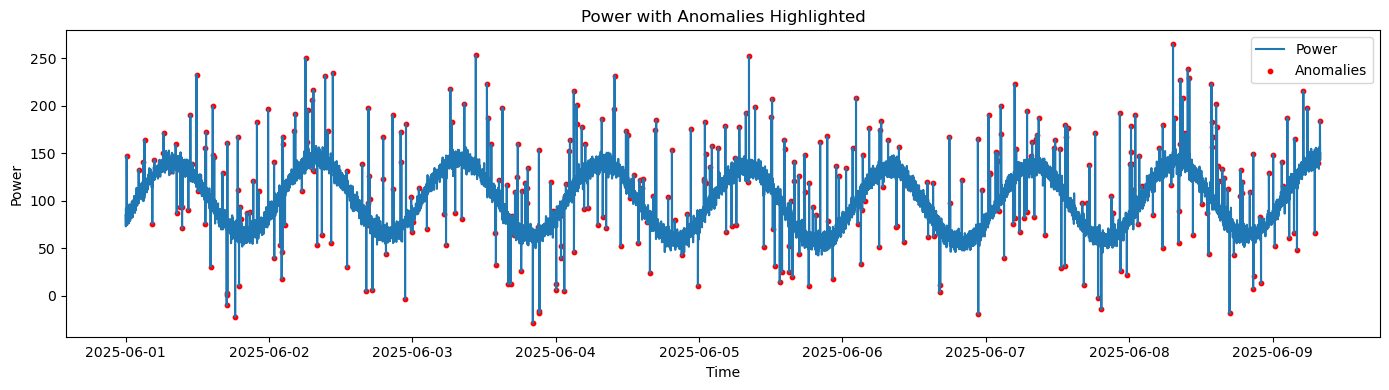

In [3]:
plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['power'], label='Power')
anoms = df[df['anomaly']==1]
plt.scatter(anoms['timestamp'], anoms['power'], color='red', label='Anomalies', s=10)
plt.title('Power with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()
plt.tight_layout()
plt.show()

## Voltage Distribution

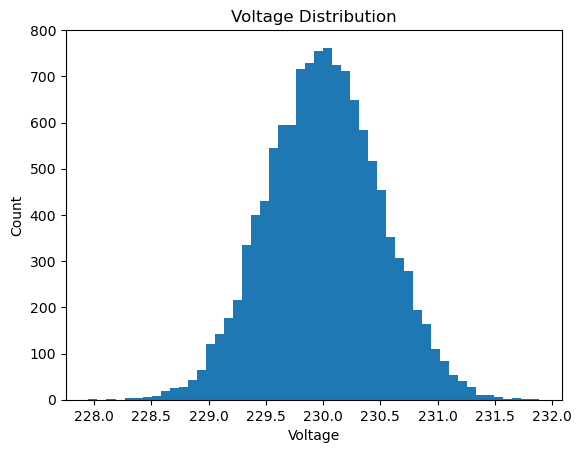

In [4]:
plt.hist(df['voltage'], bins=50)
plt.title('Voltage Distribution')
plt.xlabel('Voltage')
plt.ylabel('Count')
plt.show()

## Power Histogram (Normal vs Anomaly)

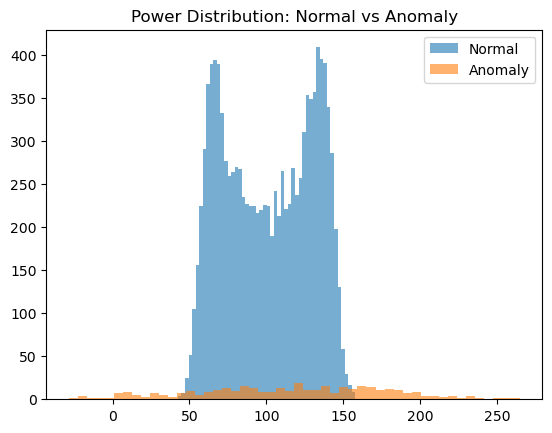

In [5]:
normal = df[df['anomaly']==0]['power']
anomaly = df[df['anomaly']==1]['power']

plt.hist(normal, bins=50, alpha=0.6, label='Normal')
plt.hist(anomaly, bins=50, alpha=0.6, label='Anomaly')
plt.title('Power Distribution: Normal vs Anomaly')
plt.legend()
plt.show()

## Correlation Heatmap

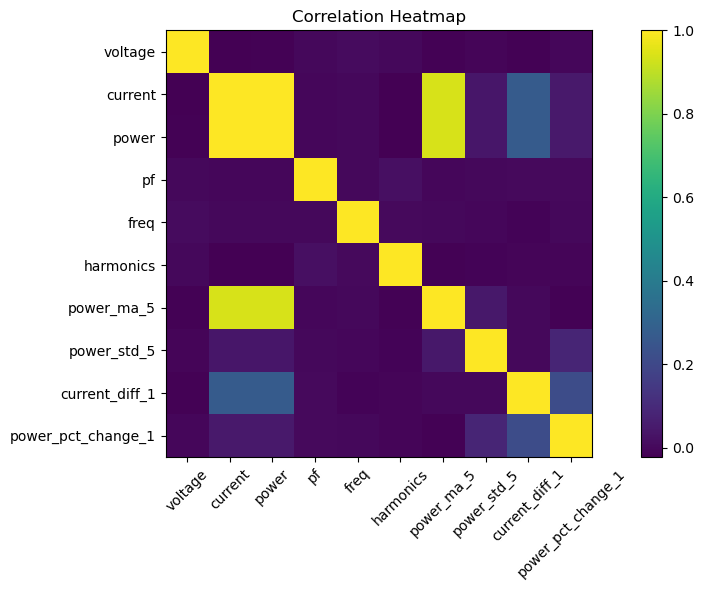

In [6]:
import numpy as np

plt.figure(figsize=(10,6))
corr = df[['voltage','current','power','pf','freq','harmonics',
           'power_ma_5','power_std_5','current_diff_1','power_pct_change_1']].corr()

plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Rolling Behavior (Power Mean & Std)

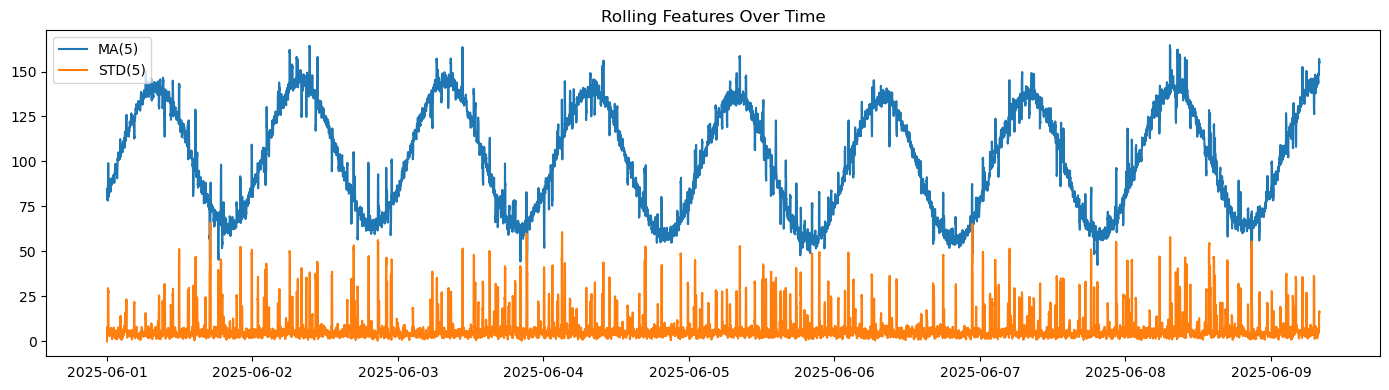

In [7]:
plt.figure(figsize=(14,4))
plt.plot(df['timestamp'], df['power_ma_5'], label='MA(5)')
plt.plot(df['timestamp'], df['power_std_5'], label='STD(5)')
plt.title('Rolling Features Over Time')
plt.legend()
plt.tight_layout()
plt.show()

## Before/After Anomaly Zoom-in

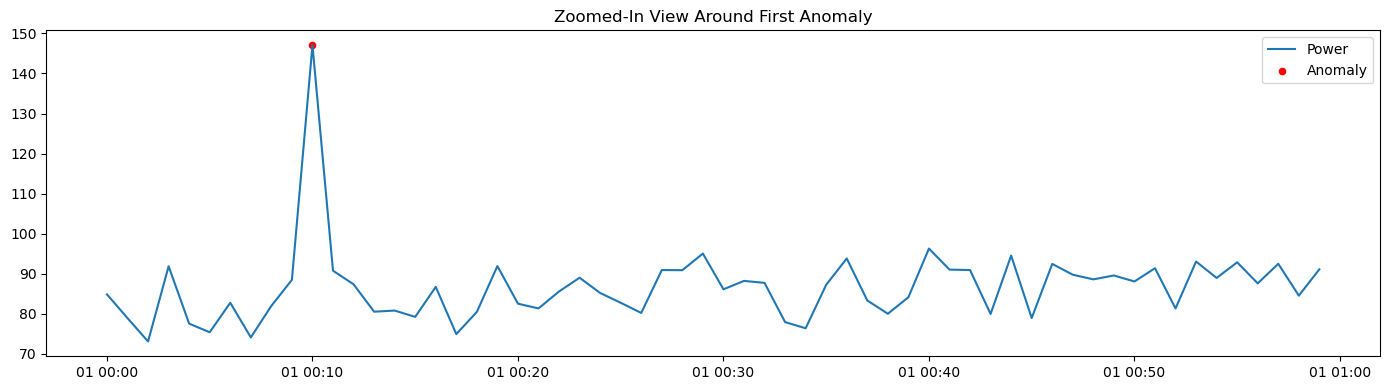

In [8]:
# Pick first anomaly index
idx = df[df['anomaly']==1].index[0]
window = df.iloc[max(0, idx-50):min(len(df), idx+50)]

plt.figure(figsize=(14,4))
plt.plot(window['timestamp'], window['power'], label='Power')
plt.scatter(window[window['anomaly']==1]['timestamp'], 
            window[window['anomaly']==1]['power'], 
            color='red', s=20, label='Anomaly')
plt.title('Zoomed-In View Around First Anomaly')
plt.legend()
plt.tight_layout()
plt.show()